Question 1: Regression (MLE and Bayesian)

Part a:


In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

In [24]:
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data=pd.read_csv("Q1.csv", header=0)
print(data.head())

        X        Y
0  0.8248  12.4334
1  0.8648  20.7942
2  1.7817  61.5848
3  0.4804  16.4973
4  1.6036  40.7799


In [26]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [27]:
data

,X,Y
0,0.8248,12.43340
1,0.8648,20.79420
2,1.7817,61.58480
3,0.4804,16.49730
4,1.6036,40.77990
5,0.3843,16.77010
6,1.8778,53.96890
7,0.5525,13.85290
8,0.3483,13.94210
9,1.3133,36.03900


In [28]:
lm=linear_model.LinearRegression()
model=lm.fit(X,Y)

In [29]:
model.score(X,Y)

0.7657067417486697

In [30]:
model.intercept_

-0.37414956825405454

In [31]:
model.coef_

array([26.76651892])

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.formula.api import glm as glm_sm
import statsmodels.api as sm
from pandas.plotting import scatter_matrix

In [33]:
np.random.seed(123)

In [34]:
alpha,sigma=1,1
beta=[1]

In [35]:
size=833

In [36]:
X=np.random.randn(size)

In [37]:
Y=alpha+2.71**beta[0]*X+np.random.randn(size)*sigma

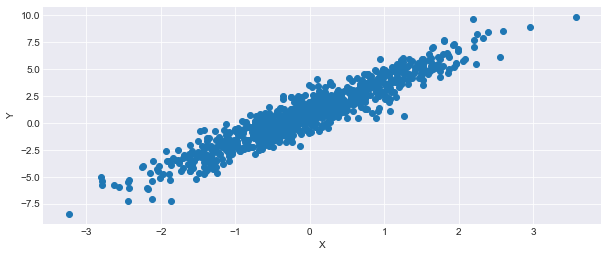

In [38]:
fig,axes=plt.subplots(1,sharex=True,figsize=(10,4))
axes.scatter(X,Y)
axes.set_ylabel('Y');axes.set_xlabel('X');


In [39]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))


Running on PyMC3 v3.7


In [21]:
basic_model=pm.Model()

with basic_model:
    #Priors for unknown model parameters
    alpha=pm.Normal('alpha',mu=0,sigma=10)
    beta=pm.Normal('beta',mu=0,sigma=10,shape=2)
    sigma=pm.HalfNormal('sigma',sigma=1)

In [22]:
#Expected value of outcome
Y=alpha+2.71**beta[0]*X

In [41]:
map_estimate = pm.find_MAP(model=basic_model, method='powell')

map_estimate

C:\Users\sevda\Anaconda3\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
  0%|          | 0/5000 [00:00<?, ?it/s]C:\Users\sevda\Anaconda3\lib\site-packages\scipy\optimize\_minimize.py:502: RuntimeWarning: Method powell does not use gradient information (jac).
  RuntimeWarning)
logp = -9.8904, ||grad|| = 1.4547e-09: 100%|██████████| 225/225 [00:00<00:00, 2655.41it/s] 


{'alpha': array(-1.3014457e-11),
 'beta': array([-9.94150581e-08, -9.94150581e-08]),
 'sigma_log__': array(-34.16556673),
 'sigma': array(1.45238883e-15)}

In [42]:
with basic_model:
    #draw 500 posterior samples
    trace=pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains: 100%|██████████| 4000/4000 [00:02<00:00, 1276.94draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.


In [43]:
trace['alpha'][-5:]

array([ 12.00063182, -11.88753666,  11.37854177,   3.96489524,
        10.90532278])

In [46]:
with basic_model:
    #instance sampler
    step=pm.Slice()
    #draw 5000 posterior samples
    trace=pm.sample(5000,step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [sigma]
>Slice: [beta]
>Slice: [alpha]
Sampling 4 chains: 100%|██████████| 22000/22000 [00:11<00:00, 1953.84draws/s]


C:\Users\sevda\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\sevda\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\sevda\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\Users\sevda\Anaconda3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend

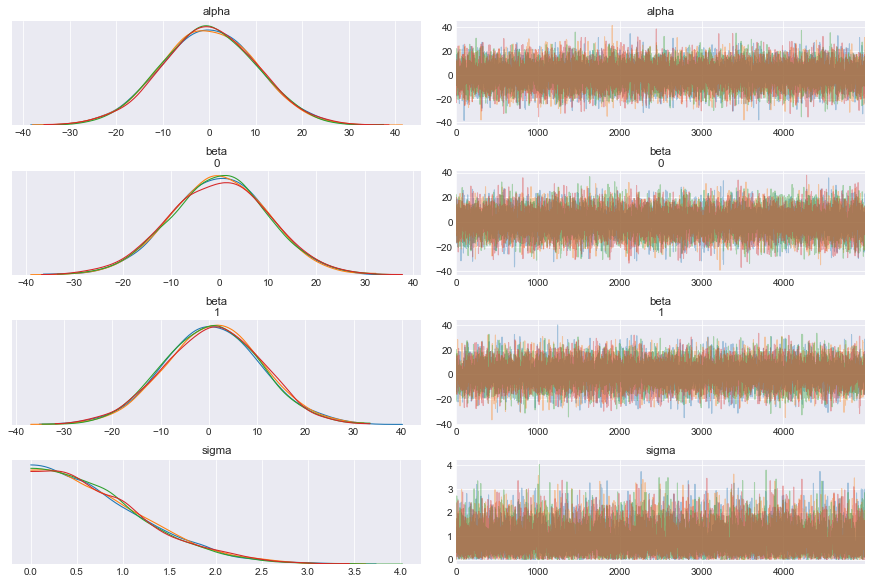

In [47]:
pm.traceplot(trace);

In [48]:
pm.summary(trace).round(2)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,-0.00,10.04,0.07,-19.55,19.78,19426.92,1.0
beta__0,-0.01,10.00,0.07,-19.18,20.04,20103.39,1.0
beta__1,0.93,9.93,0.07,-18.94,20.10,15795.81,1.0
sigma,0.80,0.60,0.00,0.00,1.96,17456.27,1.0
